<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/personagens_mapas_auto_organizaveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [10]:
pip install miniSom

  Created wheel for miniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=af6baca791543c65adc9b591c57f44388c427d960e57e41a7422eb682360dd8d
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built miniSom


In [120]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [121]:
base = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/personagens.csv')
base.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


In [122]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   laranja_camisa_bart  293 non-null    float64
 1   azul_calcao_bart     293 non-null    float64
 2   azul_sapato_bart     293 non-null    float64
 3   marrom_boca_homer    293 non-null    float64
 4   azul_calca_homer     293 non-null    float64
 5   cinza_sapato_homer   293 non-null    float64
 6   classe               293 non-null    object 
dtypes: float64(6), object(1)
memory usage: 16.1+ KB


In [123]:
x = base.iloc[:, 0:6].values
y = base.iloc[:, 6].values

In [124]:
x

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [125]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(x)
x

array([[0.35231348, 0.19711995, 0.32096694, 0.        , 0.        ,
        0.01280093],
       [0.25606564, 0.1795626 , 0.21617233, 0.        , 0.        ,
        0.00671489],
       [0.26935365, 0.28366032, 0.06129067, 0.        , 0.        ,
        0.03082025],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.48359639,
        0.01560842],
       [0.        , 0.        , 0.        , 0.        , 0.16209756,
        0.00345947],
       [0.        , 0.        , 0.        , 0.42540111, 0.0968527 ,
        0.01292127]])

In [126]:
x.shape

(293, 6)

In [127]:
celulas = 5 * np.sqrt(x.shape[0])
celulas

85.58621384311846

In [128]:
som = MiniSom(x = 10,
              y = 10,
              sigma = 1.0,
              input_len = 6,
              learning_rate = 0.5,
              random_seed = 0)

som.random_weights_init(x);
som.train_random(data = x, num_iteration = 1000);

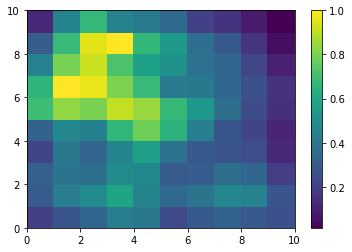

In [129]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar();

In [130]:
# o = Bart
# s = Homer
markers = ['o', 's']
colors = ['r', 'w']

In [131]:
y[y == 'Bart'] = 0 
y[y == 'Homer'] = 1

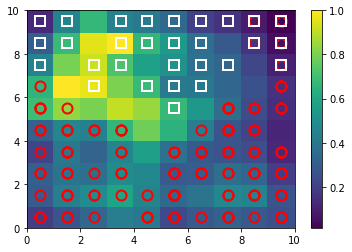

In [132]:
pcolor(som.distance_map().T)
colorbar();
for i, a in enumerate(x):
  w = som.winner(a);
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
       markerfacecolor = 'None', markersize = 10,
       markeredgecolor = colors[y[i]], markeredgewidth = 2)

In [133]:
mapeamento = som.win_map(x)

In [134]:
outliers = np.concatenate((mapeamento[(1,5)],
                            mapeamento[(2,6)], 
                            mapeamento[(2,7)], 
                            mapeamento[(3,8)]),
                            axis = 0)

In [135]:
outliers

array([[0.24628644, 0.29074397, 0.59669812, 0.        , 0.        ,
        0.00508127],
       [0.1592819 , 0.10689034, 0.18816649, 0.22371571, 0.17791309,
        0.01159674],
       [0.09590155, 0.10205497, 0.30871385, 0.34922854, 0.11707464,
        0.15722289],
       [0.12829304, 0.05804886, 0.20653078, 0.30932884, 0.11576834,
        0.13551393],
       [0.12540179, 0.04827534, 0.        , 0.31891756, 0.1561832 ,
        0.42948373],
       [0.        , 0.        , 0.        , 0.66583748, 0.34705933,
        1.        ]])

In [136]:
outliers = scaler.inverse_transform(outliers)

In [137]:
base.loc[base.classe == 0, 'classe'] = 'Bart'
base.loc[base.classe == 1, 'classe'] = 'Homer'
base.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


In [138]:
classe = []

for i in range(len(base)):
  for j in range(len(outliers)):
    if int(round(base.iloc[i, 0])) == int(round(outliers[j, 0])) and int(round(base.iloc[i, 1])) == int(round(outliers[j, 1])) and int(round(base.iloc[i, 2])) == int(round(outliers[j, 2])) and int(round(base.iloc[i, 3])) == int(round(outliers[j, 3])) and int(round(base.iloc[i, 4])) == int(round(outliers[j, 4])) and int(round(base.iloc[i, 5])) == int(round(outliers[j, 5])):
      classe.append(base.iloc[i, 6]);

classe = np.asarray(classe)
classe

array(['Bart', 'Homer', 'Homer', 'Homer', 'Homer', 'Homer'], dtype='<U5')

In [139]:
outliers

array([[ 4.8137627 ,  5.1552854 ,  2.7606797 ,  0.        ,  0.        ,
         0.02498948],
       [ 3.1132257 ,  1.8953109 ,  0.8705699 ,  7.2280116 ,  1.5685711 ,
         0.05703226],
       [ 1.8744326 ,  1.8095732 ,  1.4282935 , 11.283195  ,  1.0321888 ,
         0.773215  ],
       [ 2.5075366 ,  1.0292852 ,  0.955534  ,  9.994079  ,  1.0206718 ,
         0.66645133],
       [ 2.451026  ,  0.85598725,  0.        , 10.30388   ,  1.3769895 ,
         2.1121814 ],
       [ 0.        ,  0.        ,  0.        , 21.512486  ,  3.0598493 ,
         4.9179544 ]])

In [142]:
outliers_final = np.column_stack((outliers, classe))

In [143]:
outliers_final = pd.DataFrame(data = outliers_final, columns = ['laranja_camisa_bart', 
                                                      'azul_calcao_bart', 
                                                      'azul_sapato_bart', 
                                                      'marrom_boca_homer', 
                                                      'azul_calca_homer', 
                                                      'cinza_sapato_homer',
                                                      'classe'])
outliers_final.head(10)

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,4.8137627,5.1552854,2.7606797000000007,0.0,0.0,0.024989476,Bart
1,3.1132257,1.8953109000000001,0.8705699,7.228011599999999,1.5685711000000002,0.05703226,Homer
2,1.8744326,1.8095732,1.4282934999999997,11.283195,1.0321888000000001,0.7732150000000001,Homer
3,2.5075366000000003,1.0292852,0.955534,9.994079,1.0206718000000001,0.66645133,Homer
4,2.4510259999999997,0.85598725,0.0,10.30388,1.3769895,2.1121814,Homer
5,0.0,0.0,0.0,21.512486,3.0598492999999998,4.9179544,Homer
